In [11]:
import simulator
import matplotlib.pyplot as plt

In [14]:
files = ["miller_11.qasm", "decod24-v2_43.qasm", "one-two-three-v3_101.qasm", "hwb5_53.qasm", "alu-bdd_288.qasm", \
        "f2_232.qasm", "con1_216.qasm", "mini_alu_305.qasm", "wim_266.qasm", "cm152a_212.qasm", "squar5_261.qasm", \
        "sym6_316.qasm", "rd84_142.qasm", "cnt3-5_179.qasm"]
outputs = []
times = []
for filename in files:
    output, duration = simulator.run_circ(simulator.qasm_to_instruction(filename))
    outputs.append(output)
    times.append(duration)
    print("The output of {} is: {}\nAnd took {} ms".format(filename, output, duration))

The output of miller_11.qasm is: {(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): (1+0j)}
And took 1.001596450805664 ms
The output of decod24-v2_43.qasm is: {(0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): (1.0000000000000002+0j)}
And took 0.0 ms
The output of one-two-three-v3_101.qasm is: {(1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): (1.0000000000000002+0j)}
And took 0.0 ms
The output of hwb5_53.qasm is: {(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): (1+0j)}
And took 8.998870849609375 ms
The output of alu-bdd_288.qasm is: {(0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0): (1+0j)}
And took 1.0097026824951172 ms
The output of f2_232.qasm is: {(0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0): (1.0000000000000002+0j)}
And took 8.974313735961914 ms
The output of con1_216.qasm is: {(1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0): (1.0000000000000002+0j)}
And took 6.998777389526367 ms
The output of mini_alu_305.qasm is: {(0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0): (1.0000

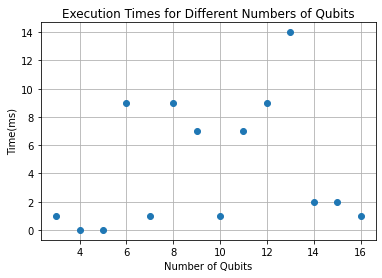

In [15]:
plt.plot(list(range(3, 17)), times, 'o')
plt.xlabel('Number of Qubits')
plt.ylabel('Time(ms)')
plt.grid()
plt.title('Execution Times for Different Numbers of Qubits')
plt.show()

In [1]:
import sys
import numpy as np
import cirq
from cirq.contrib.qasm_import import circuit_from_qasm
from pathlib import Path
# Import your simulate function here.
# cs238 can be a file, a folder with an __init__.py file,
from simulator import simulate
def cirq_simulate(qasm_string: str) -> list:
    """Simulate a qasm string
    Args:
        qasm_string: a string following the qasm format
    Returns:
        statevector: a list, with a complex number for
            each of the 2^num_qubits possible amplitudes
            Ordered big endian, see:
        
quantumai.google/reference/python/cirq/sim/StateVectorTrialResult#state_vector
    """
    circuit = circuit_from_qasm(qasm_string)
    result = cirq.Simulator().simulate(circuit)
    statevector = list(np.around(result.state_vector(), 3))
    return statevector
def compare(state_vector, cirq_state_vector):
    """Our comparison function for your grade
    Args:
        state_vector: your state vector amplitude list
        cirq_state_vector: cirq's state vector amplitude list
    Returns:
        Some value influencing your grade, subject to change :)
    """
    return np.all(np.isclose(state_vector, cirq_state_vector))

In [3]:
# get the directory of qasm files and make sure it's a directory
qasm_dir = Path(sys.argv[1])
assert qasm_dir.is_dir()
# iterate the qasm files in the directory
for qasm_file in qasm_dir.glob("**/*.qasm"):
    # read the qasm file
    with open(qasm_file, "r") as f:
        qasm_string = f.read()
    # run your simulate function on the qasm string
    state_vector = simulate(qasm_string)
    # run cirq's simulator on the qasm string
    cirq_state_vector = cirq_simulate(qasm_string)
    # compare the results!
    print(compare(state_vector, cirq_state_vector))

AssertionError: 